In [69]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from graphviz import *
%matplotlib inline

In [77]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [78]:
train.drop(['n_cores','clock_speed','m_dep'],inplace=True,axis=1)
test.drop(['n_cores','clock_speed','m_dep'],inplace=True,axis=1)

In [79]:
categorical_columns = ['price_range']
# categorical_columns2 = ['ram','int_memory','pc','fc']
boolean_columns = ['four_g','three_g','dual_sim','touch_screen','wifi','blue']

In [80]:
def convert_to_boolean(x):
    if(x==1):
        return True
    else:
        return False

In [81]:
for col in categorical_columns: train[col] = train[col].astype('category')
# for col in categorical_columns2: test[col] = test[col].astype('category')
for col in boolean_columns: train[col] = train[col].apply(convert_to_boolean).astype(bool);test[col] = test[col].apply(convert_to_boolean).astype(bool)

In [73]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    from sklearn import metrics
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='mlogloss', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)

    feat_imp = pd.Series(alg.feature_importances_, index=predictors)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 1


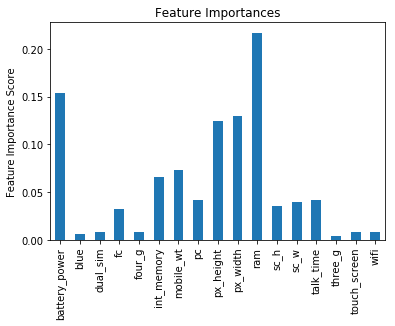

In [74]:
target = 'price_range'
IDcol = 'id'
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 num_class = 4,
 nthread=4,
 scale_pos_weight=1,
eval_metric = 'mlogloss',
 seed=27)

clf=modelfit(xgb1, train, predictors)

In [92]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eval_metric='mlogloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=260, n_jobs=1,
       nthread=4, num_class=4, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( 
    learning_rate=0.1, n_estimators=140, max_depth=5,
    min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [83]:
preds = clf.predict(test[predictors])

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [84]:
submission = pd.DataFrame({'id':test['id'],'price_range':preds})
submission.head()

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


In [85]:
filename='Mobile_price_Range10.csv'
submission.to_csv(filename,index=False)
print("saved file:"+filename)

saved file:Mobile_price_Range10.csv


In [ ]:
cols = list(train.columns)
cols.remove('price_range')
target_column = 'price_range'

In [87]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train[predictors],train[target],random_state = 123)

In [5]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
813,721,1,1.3,1,10,0,16,0.9,125,1,18,408,1862,1713,10,3,4,0,1,1
1188,732,1,2.3,1,7,1,39,0.6,188,7,11,1163,1554,3681,19,3,15,1,1,1
36,589,1,2.3,1,1,0,61,0.6,160,4,10,429,815,2113,13,7,2,1,0,1
550,1408,1,2.1,1,10,0,45,0.9,89,5,14,613,1088,3952,8,6,3,0,0,1
679,675,0,2.3,0,10,0,60,0.9,144,5,15,192,757,1735,7,0,13,1,0,1
1670,1569,1,1.6,1,4,1,54,0.9,190,4,6,371,665,3905,6,2,4,1,0,0
602,1719,1,2.0,0,0,0,12,0.3,122,8,7,240,904,462,6,3,5,0,0,0
1714,1698,0,2.8,0,10,1,7,0.8,131,8,12,26,508,2992,15,3,17,1,1,0
406,1007,0,2.0,0,0,0,45,0.1,95,5,2,1186,1529,3648,9,0,16,0,0,0
945,832,0,1.1,0,0,1,46,0.3,93,6,0,820,1366,3317,8,0,19,1,1,0


In [90]:
preds1 = clf.predict(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(preds1,y_test)

1.0